# **Exercise No. 2: Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset**

# **Exercise 1: Data Exploration and Preprocessing**

**1. Load and Explore the Data:**

In [263]:
# Data Exploration and Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Implementing K-Nearest Neighbors (KNN) Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# PCA
from sklearn.decomposition import PCA

In [264]:
# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [265]:
# Display the first 10 rows
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [266]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [267]:
# Descriptive statistics
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

**Task: Summarize the Dataset:**

In [268]:
# Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
# Missing values
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

**3. Preprocessing:**

In [269]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

**Task: split the dataset:**

In [270]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# **Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

**1. Implement a KNN Classifier:**

In [271]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

**Task: Calculate accuracy and present confusion matrix:**

In [272]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


**2. Experiment with Different Values of n_neighbors:**

In [273]:
neighbors = [3, 5, 7, 9]
accuracies = []
for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

**Task: Plot a graph:**

The optimal value of n_neighbor based on the accuracy raised at 7.

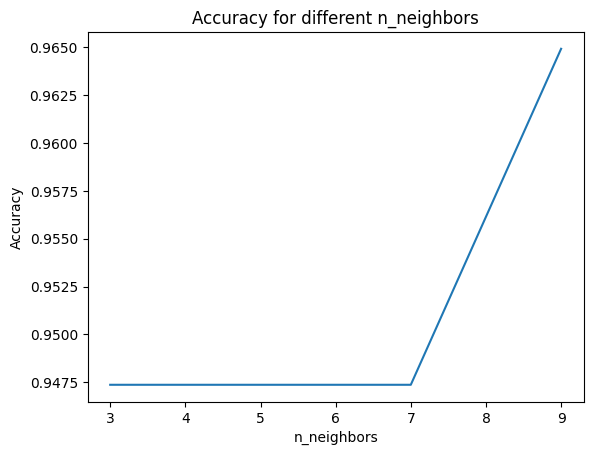

In [274]:
# Plot
plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

# **Exercise 3: Implementing Logistic Regression**

**1. Train Logistic Regression:**

In [275]:
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict test set
y_pred_lr = logreg.predict(X_test)

**Task: accuracy,  confusion matrix, classification report:**

In [276]:
# Accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Comparison of KNN and Logistic Regression:**

**Accuracy Comparison**
* Logistic Regression has an accuracy of 0.97, which is slightly higher than KNN's accuracy of 0.95. This suggests that Logistic Regression correctly classified slightly more instances than KNN on this dataset.

* F1-Score Comparison
* Logistic Regression:
* Class 0 F1-score: 0.98
* Class 1 F1-score: 0.96

* KNN does not have detailed precision, recall, and F1-scores here, but from the confusion matrix, it's clear that the performance of KNN is slightly worse. For instance, there are more misclassifications (3 wrong for both classes), which would likely result in slightly lower F1-scores than Logistic Regression.

**Conclusion: Which Model Performs Better?**
* Logistic Regression outperforms KNN in terms of both accuracy and F1-score. With Logistic Regression, you have fewer misclassifications, and its precision, recall, and F1-scores are higher overall.

**Which Model Is More Appropriate?**
* Logistic Regression is likely more appropriate if:
  * The data is linearly separable or can be modeled using linear boundaries.
  * Interpretability of the model is important. Logistic Regression provides clear coefficients that show the relationship between features and the predicted probability.
  * It's a smaller dataset where training time and simplicity are key.
* KNN could be more appropriate if:
  * The decision boundary between classes is complex and non-linear.
  * You are working with small datasets where no parametric assumptions (like linearity) should be made.
  * KNN works well for more complex patterns, but can suffer with large datasets due to its higher computational cost for predictions.

# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1. GridSearchCV for KNN:**

In [277]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


The best performing KNN model was obtained with 5 neighbors, using the Manhattan distance metric, and uniform weights. The accuracy of 96.48% indicates a strong model performance.

**2. Cross-Validation for Logistic Regression:**

In [278]:
# k-fold cross-validation
cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


The cross-validated accuracy for the Logistic Regression model is 0.9807.

This means that, on average, the Logistic Regression model achieved a 98.07% accuracy across multiple folds of the dataset, providing a robust estimate of the model's generalization performance.

# **Exercise 5: Decision Boundary Visualization**

**1. Visualizing the Decision Boundary:**

In [279]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)
# KNN and Logistic regression with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

**Task:**

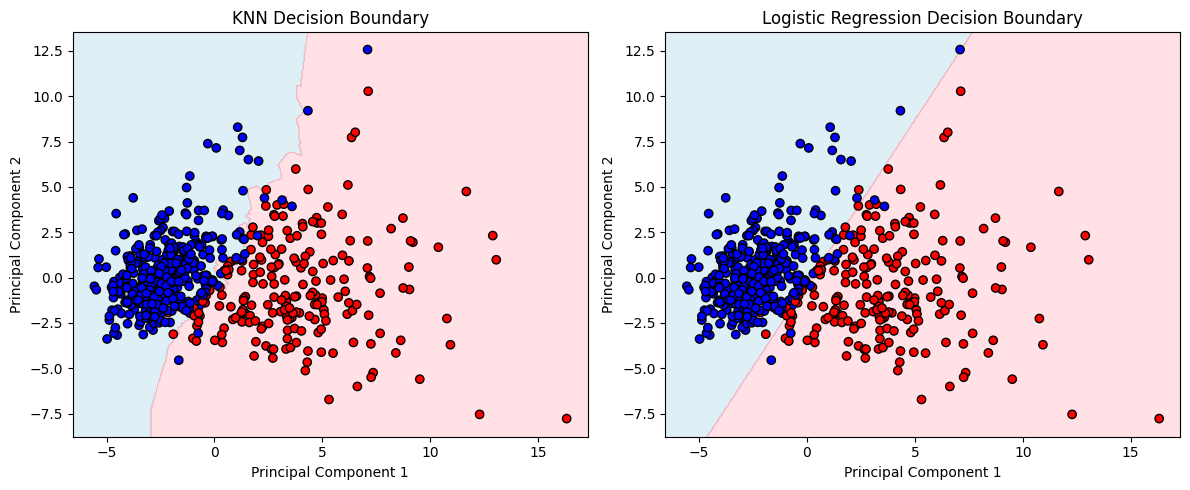

In [280]:
# Increase step size for faster computation (try 0.05 or 0.1)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict for each point in the mesh grid using KNN
Z_knn = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Predict for each point in the mesh grid using Logistic Regression
Z_logreg = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

# Plot the decision boundary for KNN and Logistic Regression
plt.figure(figsize=(12, 5))

# Subplot for KNN
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.4, cmap=ListedColormap(('lightblue', 'lightpink')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], edgecolors='k', cmap=ListedColormap(('blue', 'red')))
plt.title("KNN Decision Boundary")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Subplot for Logistic Regression
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.4, cmap=ListedColormap(('lightblue', 'lightpink')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], edgecolors='k', cmap=ListedColormap(('blue', 'red')))
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


KNN is better suited for problems where the decision boundary is non-linear and complex, allowing it to adapt to more intricate structures in the data. However, its flexibility comes at the cost of potentially overfitting to small fluctuations in the data and being computationally expensive for large datasets.

Logistic Regression, on the other hand, is a simpler and more interpretable model that works well when the classes are linearly separable. Its efficiency and interpretability make it a good choice for problems where a linear boundary is sufficient, but it may struggle in situations where a more flexible model like KNN is needed to capture complex relationships in the data.